<a href="https://colab.research.google.com/github/Dhanush-Manick/ig-analysis/blob/main/IG_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries


In [1]:
!pip install scikit-learn-intelex

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 KB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 108.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 MB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 94.9 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearnex import patch_sklearn


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


## Importing DataSets

In [3]:
data = pd.read_csv("Instagram.csv", encoding='latin1')
print(data.head())

   Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0         3920       2586           1028           619          56     98   
1         5394       2727           1838          1174          78    194   
2         4021       2085           1188             0         533     41   
3         4528       2700            621           932          73    172   
4         2518       1704            255           279          37     96   

   Comments  Shares  Likes  Profile Visits  Follows  \
0         9       5    162              35        2   
1         7      14    224              48       10   
2        11       1    131              62       12   
3        10       7    213              23        8   
4         5       4    123               8        0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a machine learni

## Data Preprocessing

In [ ]:
data.isnull().sum()
# there are no null values in this dataset

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


## IG reach Analysis

## Distribution of Impressions From Hashtags

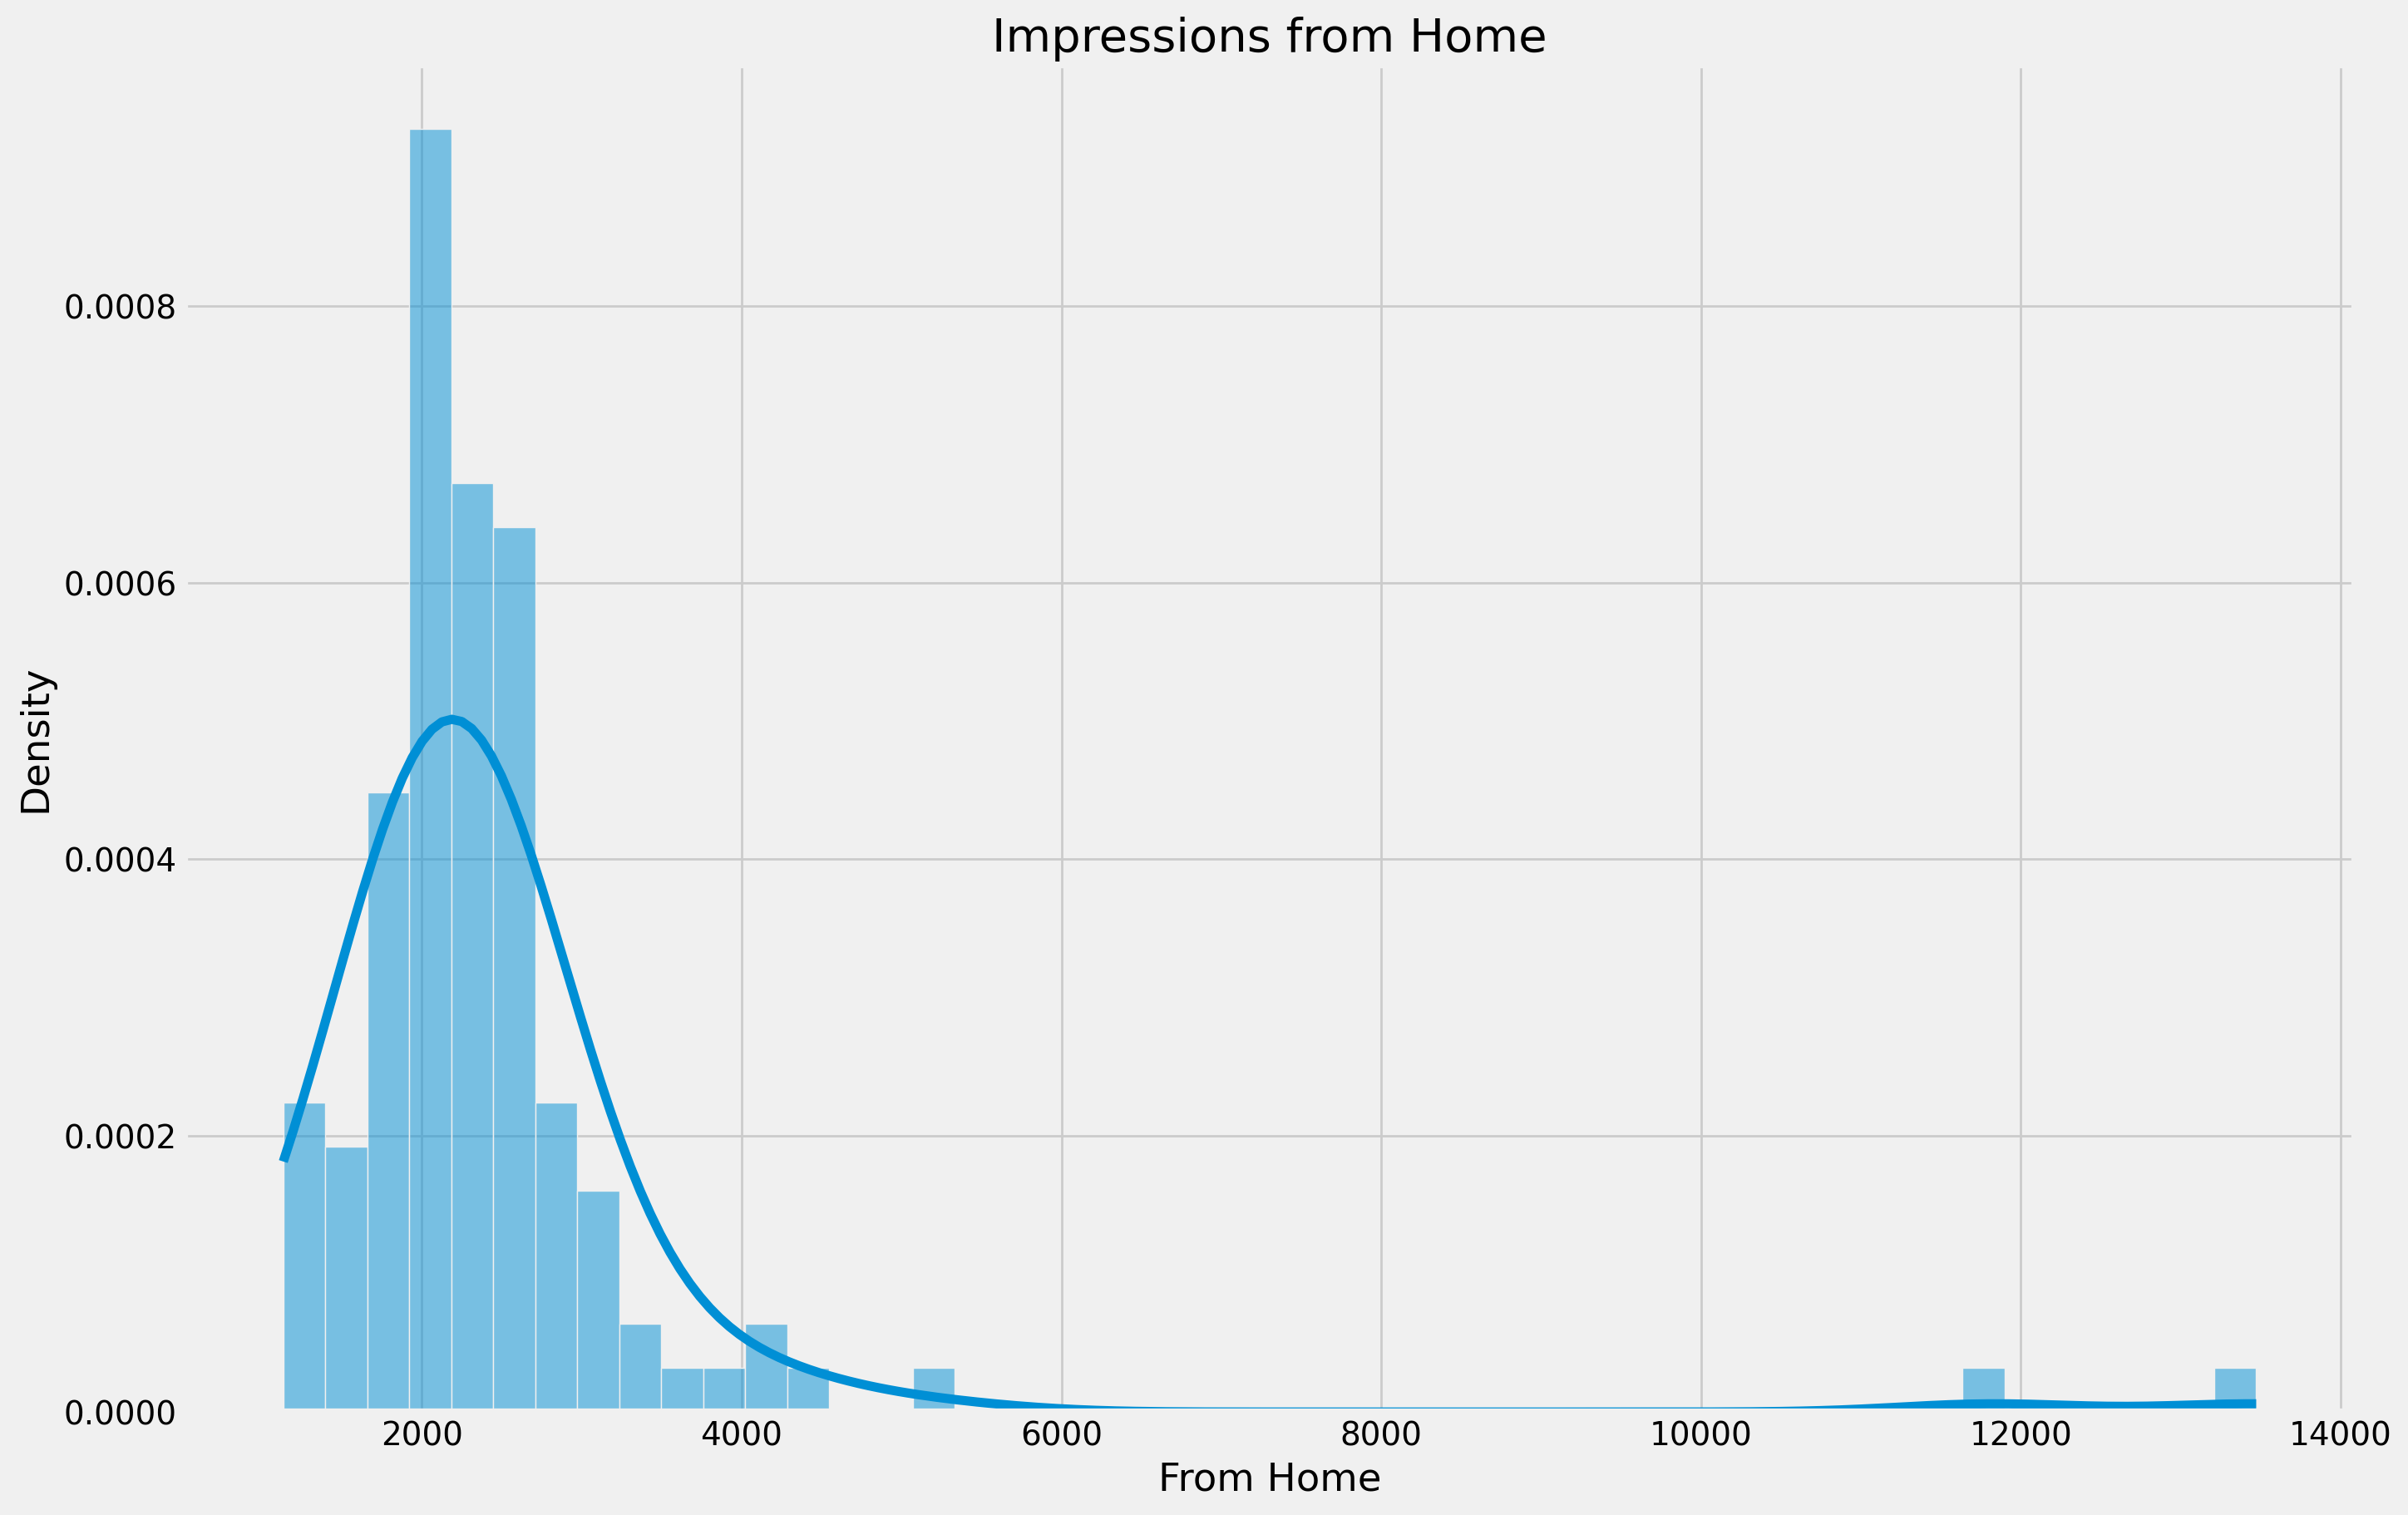

In [ ]:
plt.figure(figsize=(15,10), dpi=200.00)
plt.style.use('fivethirtyeight')
plt.title("Impressions from Home")
sns.histplot(data["From Home"], kde=True, stat='density')
plt.show()


## Distribution of impressions From Hashtags

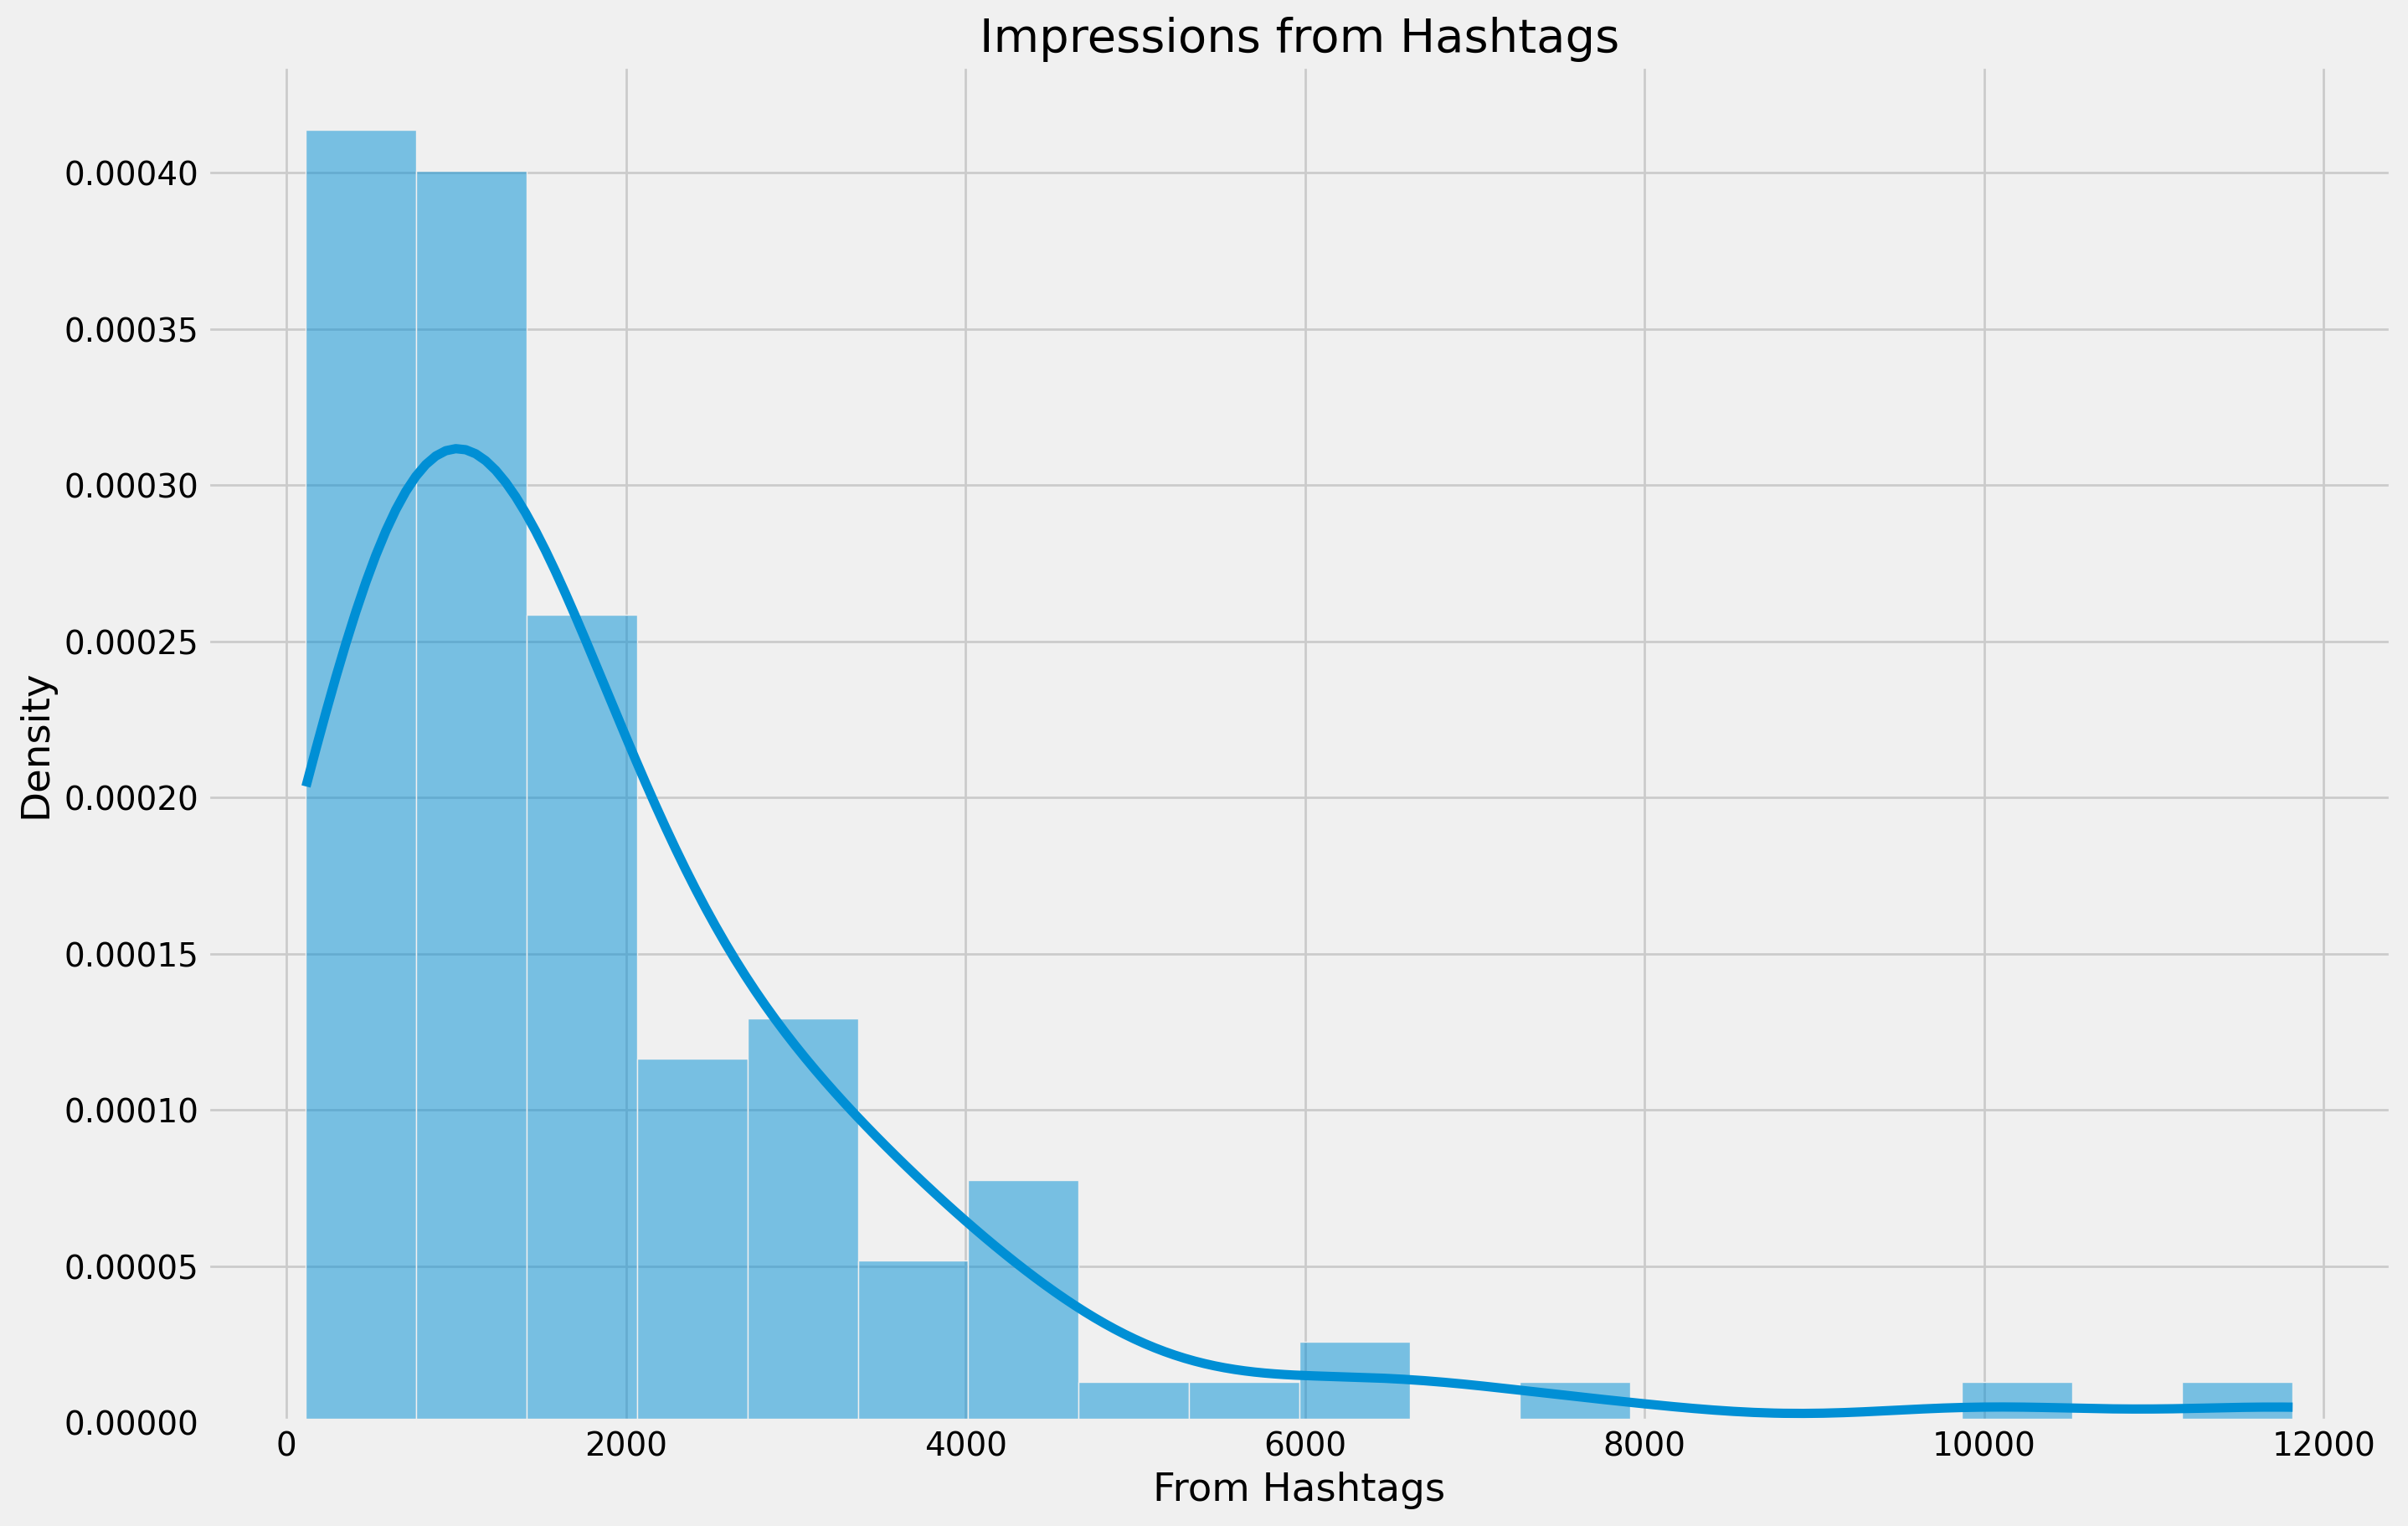

In [ ]:
plt.figure(figsize=(15,10), dpi=200.00)
plt.style.use('fivethirtyeight')
plt.title("Impressions from Hashtags")
sns.histplot(data["From Hashtags"], kde=True, stat='density')
plt.show()

## Distribution of Impressions From Explore

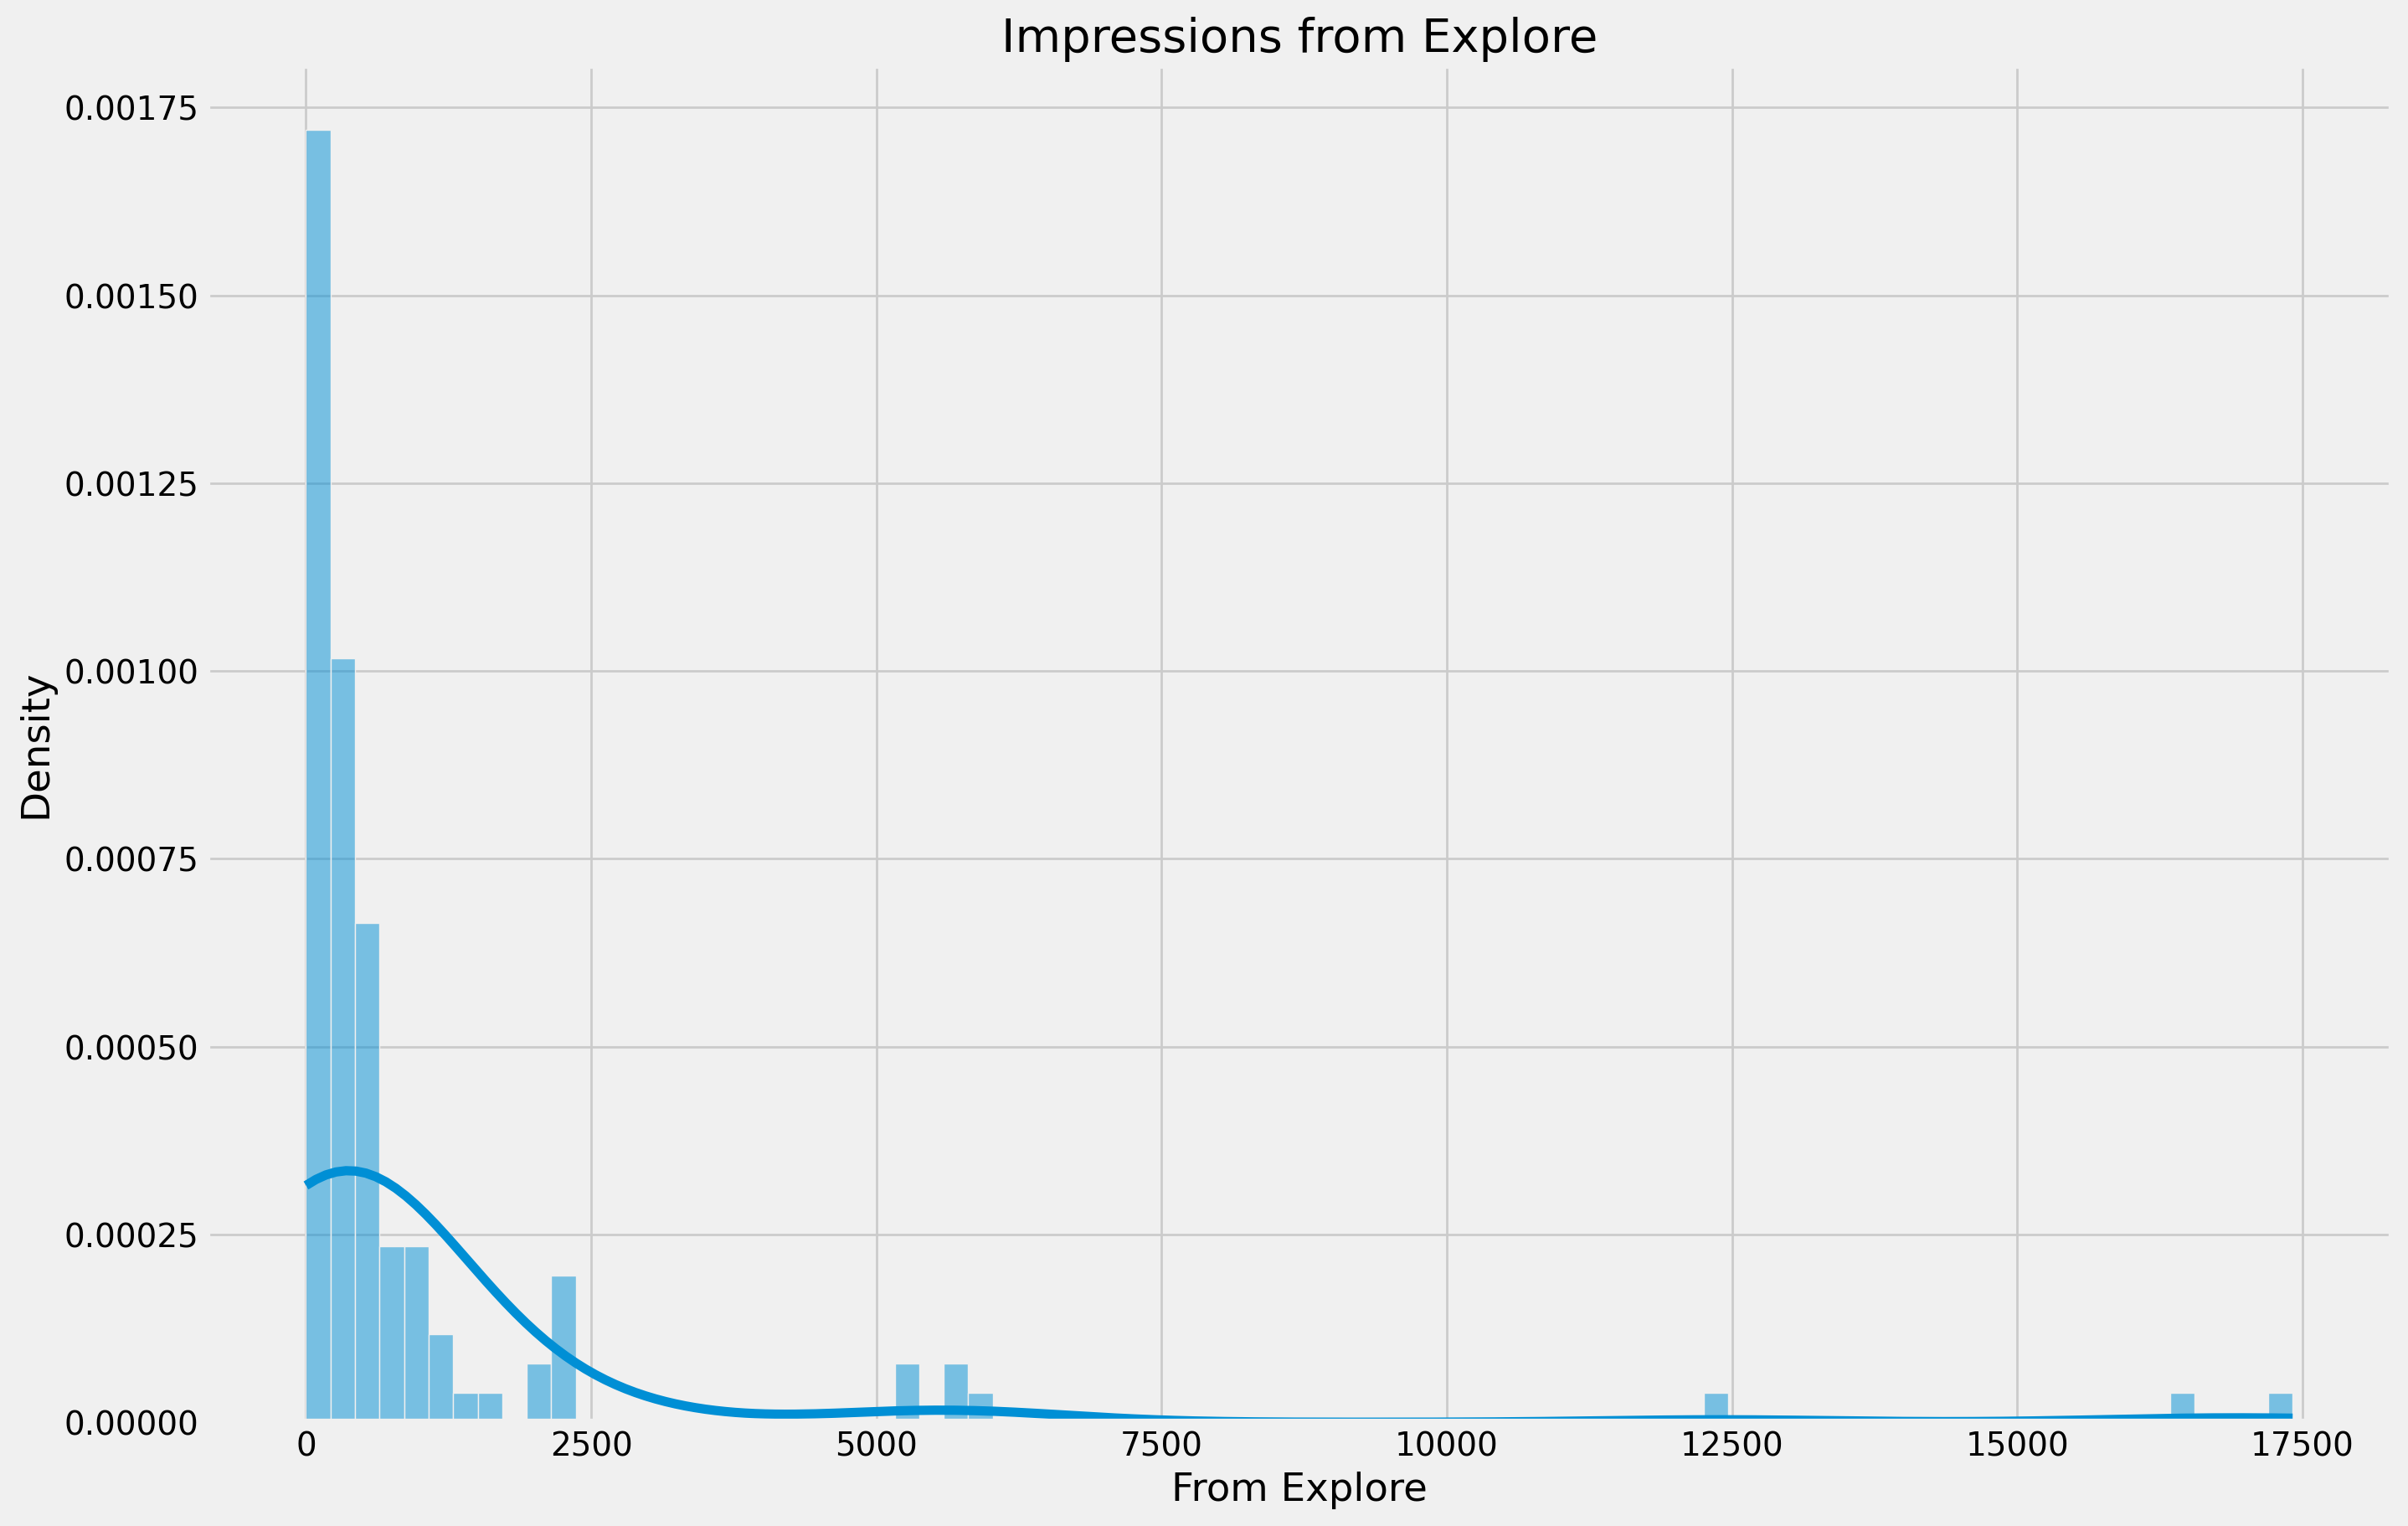

In [ ]:
plt.figure(figsize=(15,10), dpi=200.00)
plt.style.use('fivethirtyeight')
plt.title("Impressions from Explore")
sns.histplot(data["From Explore"], kde=True, stat='density')
plt.show()

## Percentage of Impressions from various sources

In [ ]:
home = data["From Home"].sum()
hashtags = data["From Hashtags"].sum()
explore = data["From Explore"].sum()
other = data["From Other"].sum()

labels = ['From Home', 'From hashtags', 'From Explore', 'Others']
values = [home, hashtags, explore, other]

fig = px.pie(data, values=values, names=labels, title='Impressions on Instagram post', hole=0.4)
fig.show()

## Analyzing Content

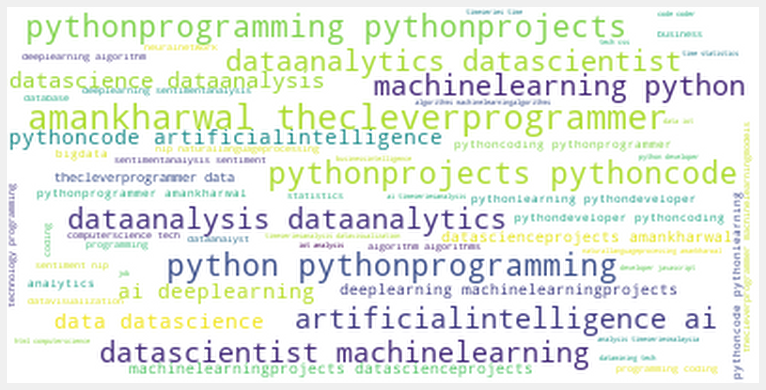

In [ ]:
text = " ".join(i for i in data.Hashtags)
stop_words = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stop_words, background_color="white").generate(text)
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='lanczos')
plt.axis('off')
plt.show()


## Analyzing Relationships

In [ ]:
figure = px.scatter(data_frame=data, x="Impressions", y="Likes", size='Likes', trendline="ols",title="relationship between likes and impressions")
figure.show()

In [ ]:
figure = px.scatter(data_frame=data, x="Impressions", y="Comments", size='Comments', trendline="ols",title="relationship between likes and impressions")
figure.show()

In [ ]:
figure = px.scatter(data_frame=data, x="Impressions", y="Saves", size='Saves', trendline="ols",title="relationship between likes and impressions")
figure.show()

##Correlation of all the columns with impression column

In [ ]:
correlation = data.corr()
print(correlation["Impressions"].sort_values(ascending=False))

Impressions       1.000000
From Explore      0.893607
Follows           0.889363
Likes             0.849835
From Home         0.844698
Saves             0.779231
Profile Visits    0.760981
Shares            0.634675
From Other        0.592960
From Hashtags     0.560760
Comments         -0.028524
Name: Impressions, dtype: float64


## Conversion Rate

In [ ]:
# Analysing how many followers we may get
# from the number of profile visits from a post

conversion_rate = (data['Follows'].sum() / data["Profile Visits"].sum()) * 100
print(conversion_rate)

41.00265604249668


## Relationship between profile visits and followers gained

In [ ]:
fig = px.scatter(data_frame=data,
                 x='Profile Visits',
                 y='Follows',
                 size='Follows',
                 trendline='ols',
                 title='Relationship between profile visits and followers gained')

figure.show()

## Instagram Reach Prediction Model

## Split data

In [4]:
x = np.array(data[['Likes', 'Saves', 'Comments', 'Shares', 'Profile Visits', 'Follows']])
y = np.array(data["Impressions"])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)



## Build Model

In [7]:
patch_sklearn()
regressor = LinearRegression()
regressor.fit(x_train, y_train)
regressor.score(x_test, y_test)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


0.8777977785012779

## Predicting results

In [6]:
# Features = [['Likes','Saves', 'Comments', 'Shares', 'Profile Visits', 'Follows']]
features = np.array([[282.0, 233.0, 4.0, 9.0, 165.0, 54.0]])
regressor.predict(features)

array([11139.58239766])